# Group Homework 3.2 - 2 Mode Network

CUNY SPS - Data 620 - Web Analytics, Summer 2018

__Prof:__ Alain Ledon<br>
__Members:__ Andrew Carson, Nathaniel Cooper, Walt Wells<br>
__Presentation:__ https://wwells.github.io/CUNY_DATA_620_GROUP/3.2_Assignment/3.2_Presentation.m4v

### Data: Davis Southern Club Women

These data were collected by Davis et al. in the 1930s. They represent observed attendance at 14 social events by 18 Southern women. The graph is bipartite (clubs, women).<br><br>Ref: https://networkx.github.io/documentation/latest/auto_examples/algorithms/plot_davis_club.html

### Question:
What can you infer about the relationships between (1) the women, and (2) the social events?  

In [1]:
import networkx as nx
import math
import networkx.algorithms.bipartite as bi
import matplotlib.pyplot as plt
import numpy as np
from scipy.cluster import hierarchy
from scipy.spatial import distance
from collections import defaultdict
import pandas as pd

plt.figure(figsize=(17,8))
%matplotlib inline

In [2]:
G = nx.davis_southern_women_graph()
women = G.graph['top']
events = G.graph['bottom']

### EDA

In [3]:
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 32
Number of edges: 89
Average degree:   5.5625


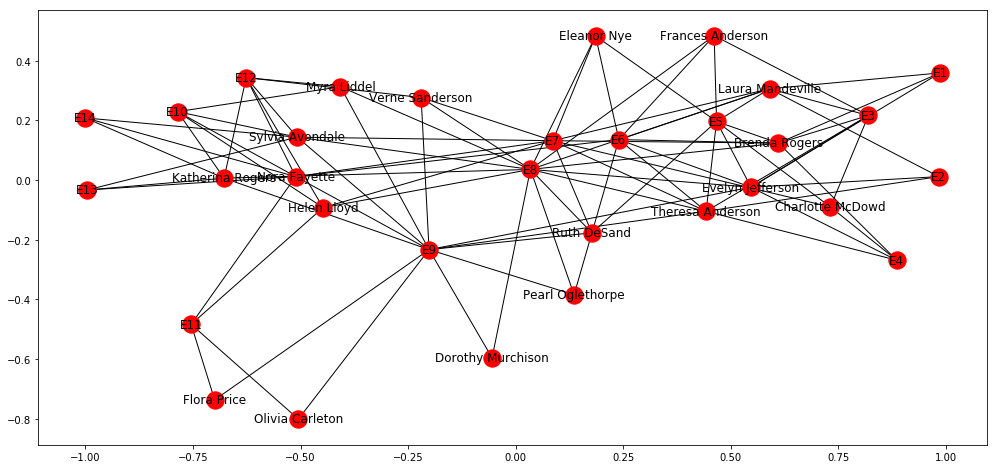

In [4]:
plt.figure(figsize=(17,8))
nx.draw_networkx(G)

## Helper Functions:   
### Weighted Projected Graph Conversion

In [5]:
def graphconvert(G, by):
    '''Collapse 2 mode to 1 and weight'''
    
    newNet = bi.weighted_projected_graph(G, by, ratio=False)
    newNet = list(nx.connected_component_subgraphs(newNet))[0]
    print(nx.info(newNet))
    
    weights = [math.log(float(edata['weight'])) for f,t,edata in newNet.edges(data=True)]
    plt.figure(figsize=(17,8))
    nx.draw_networkx(newNet, width=weights, edge_color=weights)
    
    return(newNet)

### Summary Stats 

In [6]:
def getStats(G):
    '''get basic information about graph'''
    
    d = {}
    d['center'] = nx.center(G)
    d['diameter'] = nx.diameter(G)
    d['radius'] = nx.radius(G)
    d['degrees'] = sorted(dict(list(nx.degree(G))).iteritems(), key=lambda(k,v): (-v,k))
    d['betweenness'] = sorted(nx.betweenness_centrality(G).items(), key=lambda kv: (-kv[1], kv[0]))
    d['cliques'] = list(nx.find_cliques(G))
    
    ## Taken directly from Social Network Analysis for Startups, C4
    def create_hc(G):
        """Creates hierarchical cluster of graph G from distance matrix"""
        labels=list(G.nodes())
        path_length = nx.all_pairs_shortest_path_length(G)
        distances = np.zeros((len(G), len(G)))
        i=0   
        for u,p in path_length:
            j=0
            for v,d in p.items():
                distances[i][j]=d
                distances[j][i]=d
                if i==j: distances[i][j]=0
                j+=1
            i+=1
        # Create hierarchical cluster
        Y = distance.squareform(distances)
        Z = hierarchy.complete(Y)  # Creates HC using farthest point linkage
        # This partition selection is arbitrary, for illustrive purposes
        membership = list(hierarchy.fcluster(Z, t=1.15))
        # Create collection of lists for blockmodel
        partition = defaultdict(list)
        for n, p in zip(list(range(len(G))), membership):
            partition[p].append(labels[n])
        return list(partition.values())

    d["hierarchicalclusters"] = create_hc(G)
    
    return(d)

### Study One Mode Network - Women

Name: 
Type: Graph
Number of nodes: 18
Number of edges: 139
Average degree:  15.4444


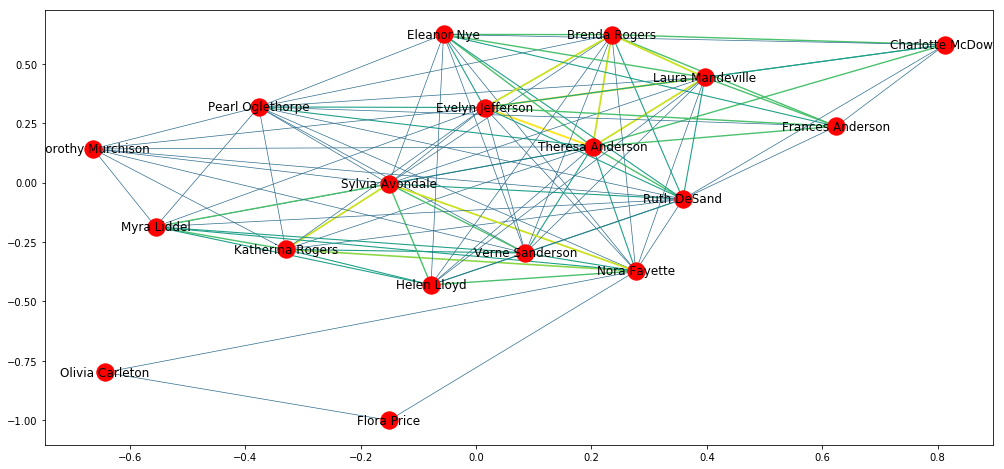

In [7]:
wNet = graphconvert(G, women)

In [8]:
getStats(wNet)

{'betweenness': [('Evelyn Jefferson', 0.010122230710466005),
  ('Helen Lloyd', 0.010122230710466005),
  ('Nora Fayette', 0.010122230710466005),
  ('Ruth DeSand', 0.010122230710466005),
  ('Sylvia Avondale', 0.010122230710466005),
  ('Theresa Anderson', 0.010122230710466005),
  ('Verne Sanderson', 0.010122230710466005),
  ('Dorothy Murchison', 0.005347593582887701),
  ('Katherina Rogers', 0.005347593582887701),
  ('Myra Liddel', 0.005347593582887701),
  ('Pearl Oglethorpe', 0.005347593582887701),
  ('Brenda Rogers', 0.00267379679144385),
  ('Eleanor Nye', 0.00267379679144385),
  ('Frances Anderson', 0.00267379679144385),
  ('Laura Mandeville', 0.00267379679144385),
  ('Charlotte McDowd', 0.0),
  ('Flora Price', 0.0),
  ('Olivia Carleton', 0.0)],
 'center': ['Theresa Anderson',
  'Nora Fayette',
  'Sylvia Avondale',
  'Verne Sanderson',
  'Evelyn Jefferson',
  'Ruth DeSand',
  'Helen Lloyd'],
 'cliques': [['Theresa Anderson',
   'Nora Fayette',
   'Sylvia Avondale',
   'Verne Sanderson',

We can see from the diagram and the summary stats there are that the center is occupied by a core 7 members.   Not coincidentally, the all have the same betweenness score.  Cliques among the members can be viewed, and when we look back our 2 mode graph, we can see these are generally associated with the events/clubs.

### Study One Mode Network - Events

Name: 
Type: Graph
Number of nodes: 14
Number of edges: 66
Average degree:   9.4286


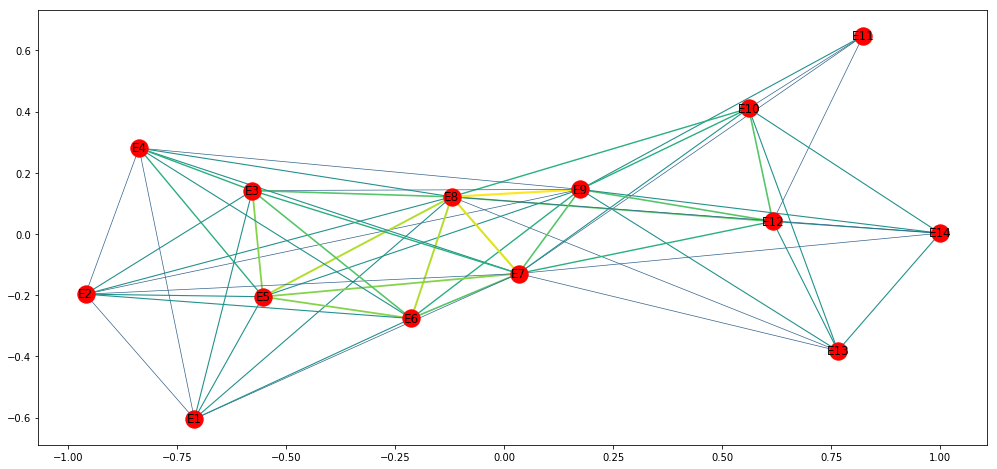

In [9]:
eNet = graphconvert(G, events)

In [10]:
getStats(eNet)

{'betweenness': [('E6', 0.08012820512820512),
  ('E7', 0.08012820512820512),
  ('E8', 0.08012820512820512),
  ('E9', 0.08012820512820512),
  ('E1', 0.0),
  ('E10', 0.0),
  ('E11', 0.0),
  ('E12', 0.0),
  ('E13', 0.0),
  ('E14', 0.0),
  ('E2', 0.0),
  ('E3', 0.0),
  ('E4', 0.0),
  ('E5', 0.0)],
 'center': ['E9', 'E8', 'E7', 'E6'],
 'cliques': [['E9', 'E8', 'E7', 'E6', 'E11', 'E10', 'E13', 'E12', 'E14'],
  ['E9', 'E8', 'E7', 'E6', 'E5', 'E4', 'E1', 'E3', 'E2']],
 'degrees': [('E6', 13),
  ('E7', 13),
  ('E8', 13),
  ('E9', 13),
  ('E1', 8),
  ('E10', 8),
  ('E11', 8),
  ('E12', 8),
  ('E13', 8),
  ('E14', 8),
  ('E2', 8),
  ('E3', 8),
  ('E4', 8),
  ('E5', 8)],
 'diameter': 2,
 'hierarchicalclusters': [['E11',
   'E10',
   'E13',
   'E12',
   'E14',
   'E9',
   'E8',
   'E7'],
  ['E5', 'E4', 'E6', 'E1', 'E3', 'E2']],
 'radius': 1}

We can see a similar pattern in our one mode event network.   There are 4 events at the center and with the same > 0 betweenness score.  We see E6-E9 as the connectors between multiple groups, just as we see the women present at at least 3 of these as central to the entire network.  

By examining our two mode network as a series of one mode networks, we're able to see more clearly the relationship between the women in the network.